In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('spam.csv')
df.head() # to display first 5 rows of the dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


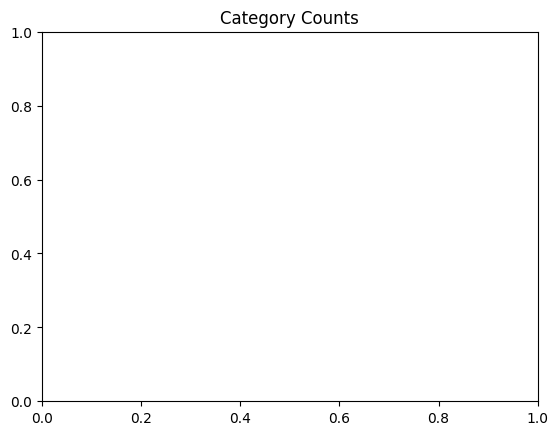

In [ ]:
#sns.countplot(df['Category'])
plt.title("Category Counts")
plt.show()

### Data Preprocessing

In [ ]:
le = LabelEncoder()

df['Category_enc'] = le.fit_transform(df['Category'])

display(df.head())

print(df.dtypes)

,Category,Message,Category_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Category        object
Message         object
Category_enc     int64
dtype: object


In [ ]:
# Store the number of words in each messages
df['word_count'] = df['Message'].str.split().str.len()


In [ ]:
# make it lower case
tokenized_messages = df['Message'].str.lower().str.split(' ')

# Print the tokens to see how it looks like
print(tokenized_messages)

0       [go, until, jurong, point,, crazy.., available...
1                    [ok, lar..., joking, wif, u, oni...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor..., u, c, already...
4       [nah, i, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ü, b, going, to, esplanade, fr, home?]
5569    [pity,, *, was, in, mood, for, that., so...any...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                    [rofl., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


In [ ]:
tokenized_messages[0]

['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amore',
 'wat...']

In [ ]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        new_s = ''.join(c for c in token if c.isalnum())
        alpha.append(new_s)
    return alpha

In [ ]:
# Apply our function to tokens
for i in range(len(tokenized_messages)):
    tokenized_messages[i]=alpha(tokenized_messages[i])
# print(tokenized_messages)

In [ ]:
df['Message']=tokenized_messages

In [ ]:
def to_sentence(tokens):
    s=""
    for token in tokens:
        s=s+" "+token
    return s[1:]

In [ ]:
for i in range(len(tokenized_messages)):
    tokenized_messages[i]=to_sentence(tokenized_messages[i])

In [ ]:
tokenized_messages

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
df["Message"]=tokenized_messages

In [ ]:
display(df)

,Category,Message,Category_enc,word_count
0,ham,go until jurong point crazy available only in ...,0,20
1,ham,ok lar joking wif u oni,0,6
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,28
3,ham,u dun say so early hor u c already then say,0,11
4,ham,nah i dont think he goes to usf he lives aroun...,0,13
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,30
5568,ham,will ü b going to esplanade fr home,0,8
5569,ham,pity was in mood for that soany other suggest...,0,10
5570,ham,the guy did some bitching but i acted like id ...,0,26


In [ ]:
from sklearn.model_selection import train_test_split
X=df.Message
y=df.Category_enc

### Apply the MultinomicalNB model

In [ ]:
# convert the text into vectors using the CountVectorizer function
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
vectors=CountVectorizer()

vector_set = vectors.fit_transform(df["Message"])




In [ ]:
# after this apply the train_test_split function to split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(vector_set, y, random_state=0, train_size = .75)
# then apply the MultinomialNB function to train the model
from sklearn.feature_extraction.text import CountVectorizer

multNB = MultinomialNB(force_alpha=True)
# then apply the predict function to predict the values of the test data
pred = multNB.fit(train_x, train_y).predict(test_x)



# then apply the accuracy_score function to calculate the accuracy of the model
print(" accuracy score : ", accuracy_score(pred, test_y))

print(" f1 score : ", f1_score(pred, test_y))
# then apply the confusion_matrix function to calculate the confusion matrix of the model
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, test_y)

 accuracy score :  0.9784637473079684
 f1 score :  0.9202127659574468


array([[1190,   12],
       [  18,  173]])

### Apply anyother model to compare the results GaussianNB etc

In [ ]:
# import any other NB model and apply the same steps as above and compare the results
from sklearn.naive_bayes import BernoulliNB


bernoulliNB_model = BernoulliNB()
bernoulliNB_model.fit(train_x, train_y)
# model pred
pred = bernoulliNB_model.predict(test_x)

print("accuracy score : ", accuracy_score(pred,test_y))
print("F1 score : ", f1_score(pred,test_y))

accuracy score :  0.9741564967695621
F1 score :  0.8959537572254336


In [ ]:
confusion_matrix(pred, test_y)

array([[1202,   30],
       [   6,  155]])

### Testing model on unseen data

In [ ]:
# take any email as input and apply the model to predict whether it is spam or not
msg = "WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."

msg = vectors.transform([msg]).toarray()

pred = bernoulliNB_model.predict(msg)
# print the result

if pred[0]==0:
    print("NOT SPAM!")
else:
    print("SPAM")



SPAM
